In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models

# **Loading the data**

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# **Splitting Phase**

In [3]:
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
objects=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
objects[2]

'bird'

In [8]:
objects[0]

'airplane'

In [9]:
def data(X,y,index):
    plt.figure(figsize=(14,2))
    plt.imshow(X[index])
    plt.xlabel(objects[y[index]])

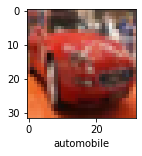

In [10]:
data(X_train,y_train,5)

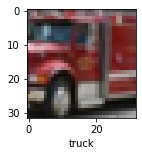

In [11]:
data(X_train,y_train,88)

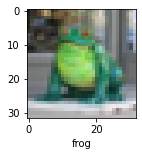

In [12]:
data(X_train,y_train,19)

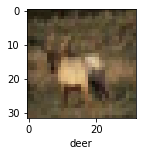

In [13]:
data(X_train,y_train,3)

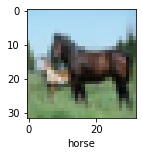

In [14]:
data(X_train,y_train,12)

# **Normalization**

In [15]:
X_train=X_train/255
X_test=X_test/255

# **Model Building**

In [16]:
model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='softmax')])
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 98s 62ms/step - loss: 1.8140 - accuracy: 0.3544
Epoch 2/20
1563/1563 [==============================] - 95s 60ms/step - loss: 1.6222 - accuracy: 0.4265
Epoch 3/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5416 - accuracy: 0.4563
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4809 - accuracy: 0.4787
Epoch 5/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4327 - accuracy: 0.4979
Epoch 6/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3895 - accuracy: 0.5119
Epoch 7/20
1563/1563 [==============================] - 96s 62ms/step - loss: 1.3525 - accuracy: 0.5260
Epoch 8/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3181 - accuracy: 0.5378
Epoch 9/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2837 - accuracy: 0.5497
Epoch 10/20
1563/1563 [==============================] - 95s 61m

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 13s 39ms/step - loss: 1.3099 - accuracy: 0.5489


[1.3099454641342163, 0.5489000082015991]

In [22]:
y_pred=model.predict(X_test)
y_pred_objects=[np.argmax(element) for element in y_pred]


print("Classification Report: \n",classification_report(y_test, y_pred_objects))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.69      0.64      1000
           1       0.61      0.76      0.68      1000
           2       0.53      0.33      0.41      1000
           3       0.45      0.27      0.34      1000
           4       0.46      0.50      0.48      1000
           5       0.43      0.50      0.46      1000
           6       0.71      0.45      0.56      1000
           7       0.46      0.78      0.58      1000
           8       0.71      0.65      0.68      1000
           9       0.63      0.55      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.54     10000
weighted avg       0.56      0.55      0.54     10000



In [26]:
model1=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),layers.MaxPooling2D((2,2)),layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),layers.MaxPooling2D((2,2)), layers.Flatten(),layers.Dense(64,activation='relu'),layers.Dense(10,activation='softmax') ])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model1.fit(X_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4953 - accuracy: 0.4605
Epoch 2/25
1563/1563 [==============================] - 96s 62ms/step - loss: 1.1294 - accuracy: 0.6059
Epoch 3/25
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0100 - accuracy: 0.6508
Epoch 4/25
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9270 - accuracy: 0.6792
Epoch 5/25
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8642 - accuracy: 0.6996
Epoch 6/25
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8083 - accuracy: 0.7205
Epoch 7/25
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7596 - accuracy: 0.7390
Epoch 8/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7208 - accuracy: 0.7497
Epoch 9/25
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6813 - accuracy: 0.7630
Epoch 10/25
1563/1563 [==============================] - 61s 39m

In [28]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.3638 - accuracy: 0.6759


[1.3637778759002686, 0.6758999824523926]

In [29]:
y_test=y_test.reshape(-1,)

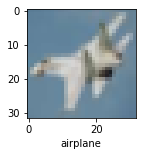

In [30]:
data(X_test,y_test,10)

In [31]:
y_pred=model1.predict(X_test)
y_pred[:5]

array([[9.0829008e-06, 5.1121729e-06, 1.3143358e-07, 9.7539449e-01,
        9.5657857e-11, 4.2573479e-04, 1.0189746e-05, 7.6885824e-11,
        2.4148244e-02, 7.0462520e-06],
       [9.1948554e-05, 4.8110541e-03, 1.7414445e-09, 1.4331365e-10,
        3.2353395e-13, 9.0595066e-12, 3.0358646e-11, 9.1728110e-18,
        9.9488008e-01, 2.1692824e-04],
       [9.6231812e-01, 1.1361582e-02, 1.7772535e-06, 1.0563586e-03,
        3.9821753e-06, 2.6086270e-06, 2.1774733e-05, 7.3319399e-09,
        2.5188129e-02, 4.5701931e-05],
       [9.9702197e-01, 7.2881798e-05, 6.2308045e-06, 3.8261740e-09,
        5.0529853e-10, 2.1665300e-12, 6.0356959e-09, 1.8144736e-11,
        2.8989685e-03, 2.7596890e-08],
       [1.8470427e-10, 1.2850178e-05, 1.1640892e-03, 1.7799357e-02,
        1.5849552e-01, 1.2566619e-04, 8.2239610e-01, 1.5024020e-11,
        6.3810216e-06, 2.1462053e-11]], dtype=float32)

In [32]:
objects1=[np.argmax(element) for element in y_pred]
objects1[:5]

[3, 8, 0, 0, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

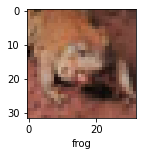

In [34]:
data(X_test,y_test,5)

In [35]:
objects[objects1[5]]

'frog'

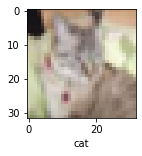

In [36]:
data(X_test,y_test,8)

In [37]:
objects[objects1[8]]

'cat'

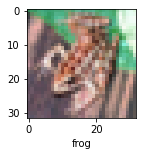

In [38]:
data(X_test,y_test,95)

In [39]:
objects[objects1[95]]

'frog'

# **Model Saving**

In [40]:
model.save('CIFARmodel.h5')